In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in d:\anaconda\envs\pythonadv\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_time0bk', 'koi_slogg', 'koi_srad', 'koi_kepmag']]
selected_features

,koi_period,koi_time0bk,koi_slogg,koi_srad,koi_kepmag
0,54.418383,162.513840,4.467,0.927,15.347
1,19.899140,175.850252,4.544,0.868,15.436
2,1.736952,170.307565,4.564,0.791,15.597
3,2.525592,171.595550,4.438,1.046,15.509
4,4.134435,172.979370,4.486,0.972,15.714
...,...,...,...,...,...
6986,8.589871,132.016100,4.296,1.088,14.478
6987,0.527699,131.705093,4.529,0.903,14.082
6988,1.739849,133.001270,4.444,1.031,14.757
6989,0.681402,132.181750,4.447,1.041,15.385


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from tensorflow.keras.utils import to_categoric

In [7]:
#assign x and y values
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X_Scaler=MinMaxScaler().fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)
#y_scaler = StandardScaler().fit(y_train)



# Train the Model



# Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(X_train_scaled, y_train)

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8506580202174328
Testing Data Score: 0.8432494279176201


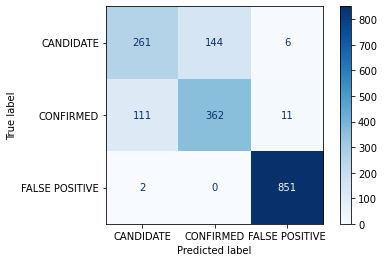

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
plot_confusion_matrix(model, X_test_scaled, y_test, cmap=plt.cm.Blues)

plt.show()

# SVM Model

In [14]:
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')

In [15]:
model2.fit(X_train_scaled, y_train)
#predictions = model.predict(X_test)

SVC(kernel='linear')

In [16]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.8455082967766546
Testing Data Score: 0.8415331807780321


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [37]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1','l2'],
              'C': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [38]:
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [39]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l1 ............................................
[CV] .................. C=0.0001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ................ C=0.0001, penalty=l2, score=0.505, total=   0.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s


[CV] ................ C=0.0005, penalty=l2, score=0.505, total=   0.0s
[CV] C=0.0005, penalty=l2 ............................................
[CV] ................ C=0.0005, penalty=l2, score=0.506, total=   0.0s
[CV] C=0.0005, penalty=l2 ............................................
[CV] ................ C=0.0005, penalty=l2, score=0.505, total=   0.0s
[CV] C=0.0005, penalty=l2 ............................................
[CV] ................ C=0.0005, penalty=l2, score=0.506, total=   0.0s
[CV] C=0.0005, penalty=l2 ............................................
[CV] ................ C=0.0005, penalty=l2, score=0.506, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] 

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ................. C=0.001, penalty=l2, score=0.505, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.506, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.505, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.506, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.506, total=   0.1s
[CV] C=0.005, penalty=l1 .............................................
[CV] ................... C=0.005, penalty=l1, score=nan, total=   0.0s
[CV] C=0.005, penalty=l1 .............................................
[CV] ................... C=0.005, penalty=l1, score=nan, total=   0.0s
[CV] C=0.005, penalty=l1 .............................................
[CV] .

D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ................... C=0.005, penalty=l1, score=nan, total=   0.0s
[CV] C=0.005, penalty=l1 .............................................
[CV] ................... C=0.005, penalty=l1, score=nan, total=   0.0s
[CV] C=0.005, penalty=l2 .............................................
[CV] ................. C=0.005, penalty=l2, score=0.822, total=   0.1s
[CV] C=0.005, penalty=l2 .............................................
[CV] ................. C=0.005, penalty=l2, score=0.812, total=   0.1s
[CV] C=0.005, penalty=l2 .............................................
[CV] ................. C=0.005, penalty=l2, score=0.824, total=   0.1s
[CV] C=0.005, penalty=l2 .............................................
[CV] ................. C=0.005, penalty=l2, score=0.798, total=   0.1s
[CV] C=0.005, penalty=l2 .............................................
[CV] ................. C=0.005, penalty=l2, score=0.809, total=   0.1s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.0005, 0.001, 0.005],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [40]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.005, 'penalty': 'l2'}
0.8128897750674943


In [26]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid2 = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid2 = GridSearchCV(model2, param_grid2, verbose=3)

In [27]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.858, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.833, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.855, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.832, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.835, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.858, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.833, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.855, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.832, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.896, total=   0.4s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.879, total=   0.4s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.891, total=   0.4s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.872, total=   0.3s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.873, total=   0.4s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.896, total=   0.4s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.879, total=   0.4s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   24.2s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [28]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 50, 'gamma': 0.0001}
0.8823155822702828


# Save the Model

In [42]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
model = 'logistic_regression.sav'
joblib.dump(model, 'Logistic Regression.sav')

['Logistic Regression.sav']

In [43]:
model2 = 'SVM.sav'
joblib.dump(model, 'SVM.sav')

['SVM.sav']